0. 도메인 살펴보기

1. 가설 세우기
    비나 눈이 오면 자전거 대여 수가 감소할 것이다.
    봄과 가을에 자전거 대여 수가 가장 많을 것이다.
    즉, 자전거 대여 수는 날씨에 영향을 많이 받을 것이다.
    
2. 따릉이 데이터 소개
    Date : 날짜
    Rented Bike Count :  하루 총 대여 수
    Hour : 대여 시각
    Temperature(¡ÆC) : 기온
    Humidity(%) : 습도
    Wind speed (m/s) : 풍속
    Visibility (10m) : 가시거리
    Dew point temperature(¡ÆC) : 이슬점
    Solar Radiation (MJ/m2) : 태양 복사량
    Rainfall(mm) : 강우량
    Snowfall (cm) : 강설량
    Seasons : 계절
    Holiday : 공휴일
    Functioning Day : 오작동 여부

3. 라이브러리 불러오기

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
%config InlineBackend.figure_format = 'retina' 

In [ ]:
4. EDA
    4-1. 데이터 살펴보기

In [120]:
#따릉이 데이터 불러오기
import pandas as pd
data = pd.read_csv('C:/Users/조현서/Desktop/traindata.csv',encoding='unicode_escape')

In [20]:
#앞 5개 행 추출
data.head()

,Date,Rented Bike Count,Hour,Temperature(¡ÆC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(¡ÆC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,24/10/2018,1492,16,NaN,42,1.3,1976,5.0,1.22,0.0,0.0,NaN,No Holiday,Yes
1,01/05/2018,1536,14,23.0,64,2.8,520,15.8,1.59,0.0,0.0,Spring,Holiday,Yes
2,14/11/2018,327,2,6.2,59,0.6,1584,-1.2,0.00,0.0,0.0,Autumn,No Holiday,Yes
3,31/08/2018,170,4,23.2,83,1.6,1102,20.1,0.00,0.0,0.0,Summer,No Holiday,Yes
4,26/06/2018,45,5,23.7,64,0.9,876,16.4,0.00,0.1,0.0,Summer,No Holiday,Yes


In [22]:
#뒤 5개 행 추출
data.tail()

,Date,Rented Bike Count,Hour,Temperature(¡ÆC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(¡ÆC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
7003,08/02/2018,255,7,-9.6,67,1.0,1503,-14.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7004,28/03/2018,104,4,10.6,77,0.9,422,6.7,0.00,0.0,0.0,Spring,No Holiday,Yes
7005,30/04/2018,569,0,14.7,54,1.3,718,5.4,0.00,0.0,0.0,Spring,No Holiday,Yes
7006,29/05/2018,2234,8,20.5,66,1.7,1062,13.9,0.34,0.0,0.0,Spring,No Holiday,Yes
7007,20/09/2018,1290,17,19.3,76,2.1,2000,14.9,0.21,0.0,0.0,NaN,No Holiday,Yes


In [98]:
#처음에 Hour변수가 자전거를 이용한 시간인지, 대여한 시각인지 의문
data[(data.Hour==0)]
#이로써 Hour변수는 자전거를 대여한 총 시간이 아닌, 빌린 시각이라는 점이 확실해짐

,Date,Rented Bike Count,Hour,Temperature(¡ÆC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(¡ÆC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
19,10/11/2018,754,0,NaN,77,0.9,433,7.4,0.0,0.0,0.0,Autumn,No Holiday,Yes
97,10/07/2018,29,0,20.4,97,0.3,183,19.9,0.0,5.5,0.0,Summer,No Holiday,Yes
165,17/07/2018,1003,0,26.4,76,1.2,2000,21.8,0.0,0.0,0.0,Summer,No Holiday,Yes
169,27/04/2018,663,0,11.8,59,2.4,1535,4.0,0.0,0.0,0.0,Spring,No Holiday,Yes
206,18/02/2018,99,0,-3.6,33,NaN,2000,-17.5,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6938,19/03/2018,67,0,7.0,81,1.1,421,3.9,0.0,0.5,0.0,Spring,No Holiday,Yes
6960,16/04/2018,401,0,8.3,59,2.1,1912,0.7,0.0,0.0,0.0,Spring,No Holiday,Yes
6965,15/11/2018,610,0,7.7,67,0.4,1102,1.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
6979,23/02/2018,42,0,NaN,86,2.7,54,-0.3,0.0,0.4,0.4,Winter,No Holiday,Yes


In [24]:
data.info() #결측치, 변수 타입, 데이터 차원 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7008 entries, 0 to 7007
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        7008 non-null   object 
 1   Rented Bike Count           7008 non-null   int64  
 2   Hour                        7008 non-null   int64  
 3   Temperature(¡ÆC)            6306 non-null   float64
 4   Humidity(%)                 7008 non-null   int64  
 5   Wind speed (m/s)            6303 non-null   float64
 6   Visibility (10m)            7008 non-null   int64  
 7   Dew point temperature(¡ÆC)  7008 non-null   float64
 8   Solar Radiation (MJ/m2)     7008 non-null   float64
 9   Rainfall(mm)                7008 non-null   float64
 10  Snowfall (cm)               7008 non-null   float64
 11  Seasons                     6309 non-null   object 
 12  Holiday                     7008 non-null   object 
 13  Functioning Day             7008 

In [26]:
data.describe #기술통계량

,Rented Bike Count,Hour,Temperature(¡ÆC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(¡ÆC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,7008.000000,7008.000000,6306.000000,7008.000000,6303.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000
mean,708.597603,11.559646,13.030082,58.141981,1.732937,1440.761558,4.042066,0.574576,0.150271,0.075300
std,647.980391,6.923619,11.986773,20.423404,1.030763,607.545441,13.121249,0.874529,1.134598,0.440936
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,6.000000,3.600000,42.000000,1.000000,946.000000,-4.800000,0.000000,0.000000,0.000000
50%,505.500000,12.000000,14.000000,57.000000,1.500000,1703.000000,5.100000,0.010000,0.000000,0.000000
75%,1071.000000,18.000000,22.675000,74.000000,2.350000,2000.000000,14.900000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [28]:
data.isna().sum(axis=0).sort_values() #결측치 개수 오름차순으로 정렬

Date                            0
Rented Bike Count               0
Hour                            0
Humidity(%)                     0
Visibility (10m)                0
Dew point temperature(¡ÆC)      0
Solar Radiation (MJ/m2)         0
Rainfall(mm)                    0
Snowfall (cm)                   0
Holiday                         0
Functioning Day                 0
Seasons                       699
Temperature(¡ÆC)              702
Wind speed (m/s)              705
dtype: int64

In [30]:
#Seasons변수의 결측값이 포함된 행 추출
data[data['Seasons'].isna()]

,Date,Rented Bike Count,Hour,Temperature(¡ÆC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(¡ÆC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,24/10/2018,1492,16,NaN,42,1.3,1976,5.0,1.22,0.0,0.0,NaN,No Holiday,Yes
22,31/08/2018,987,14,29.3,41,1.9,1928,14.6,3.00,0.0,0.0,NaN,No Holiday,Yes
30,09/11/2018,0,23,10.9,76,1.2,456,6.8,0.00,0.0,0.0,NaN,No Holiday,No
47,15/09/2018,1566,18,NaN,76,1.2,2000,19.6,0.12,0.0,0.0,NaN,No Holiday,Yes
55,24/01/2018,121,22,-15.2,45,4.0,2000,-24.4,0.00,0.0,0.7,NaN,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6926,15/03/2018,567,21,10.4,96,2.7,499,9.7,0.00,0.0,0.0,NaN,No Holiday,Yes
6968,22/07/2018,772,1,NaN,60,0.8,2000,18.8,0.00,0.0,0.0,NaN,No Holiday,Yes
6983,28/11/2018,1540,8,NaN,29,1.1,1337,-14.1,0.02,0.0,0.0,NaN,No Holiday,Yes
6988,13/06/2018,2088,14,26.6,50,2.4,1119,15.3,2.95,0.0,0.0,NaN,No Holiday,Yes


Text(0.5, 1.0, 'correalation heatmap')

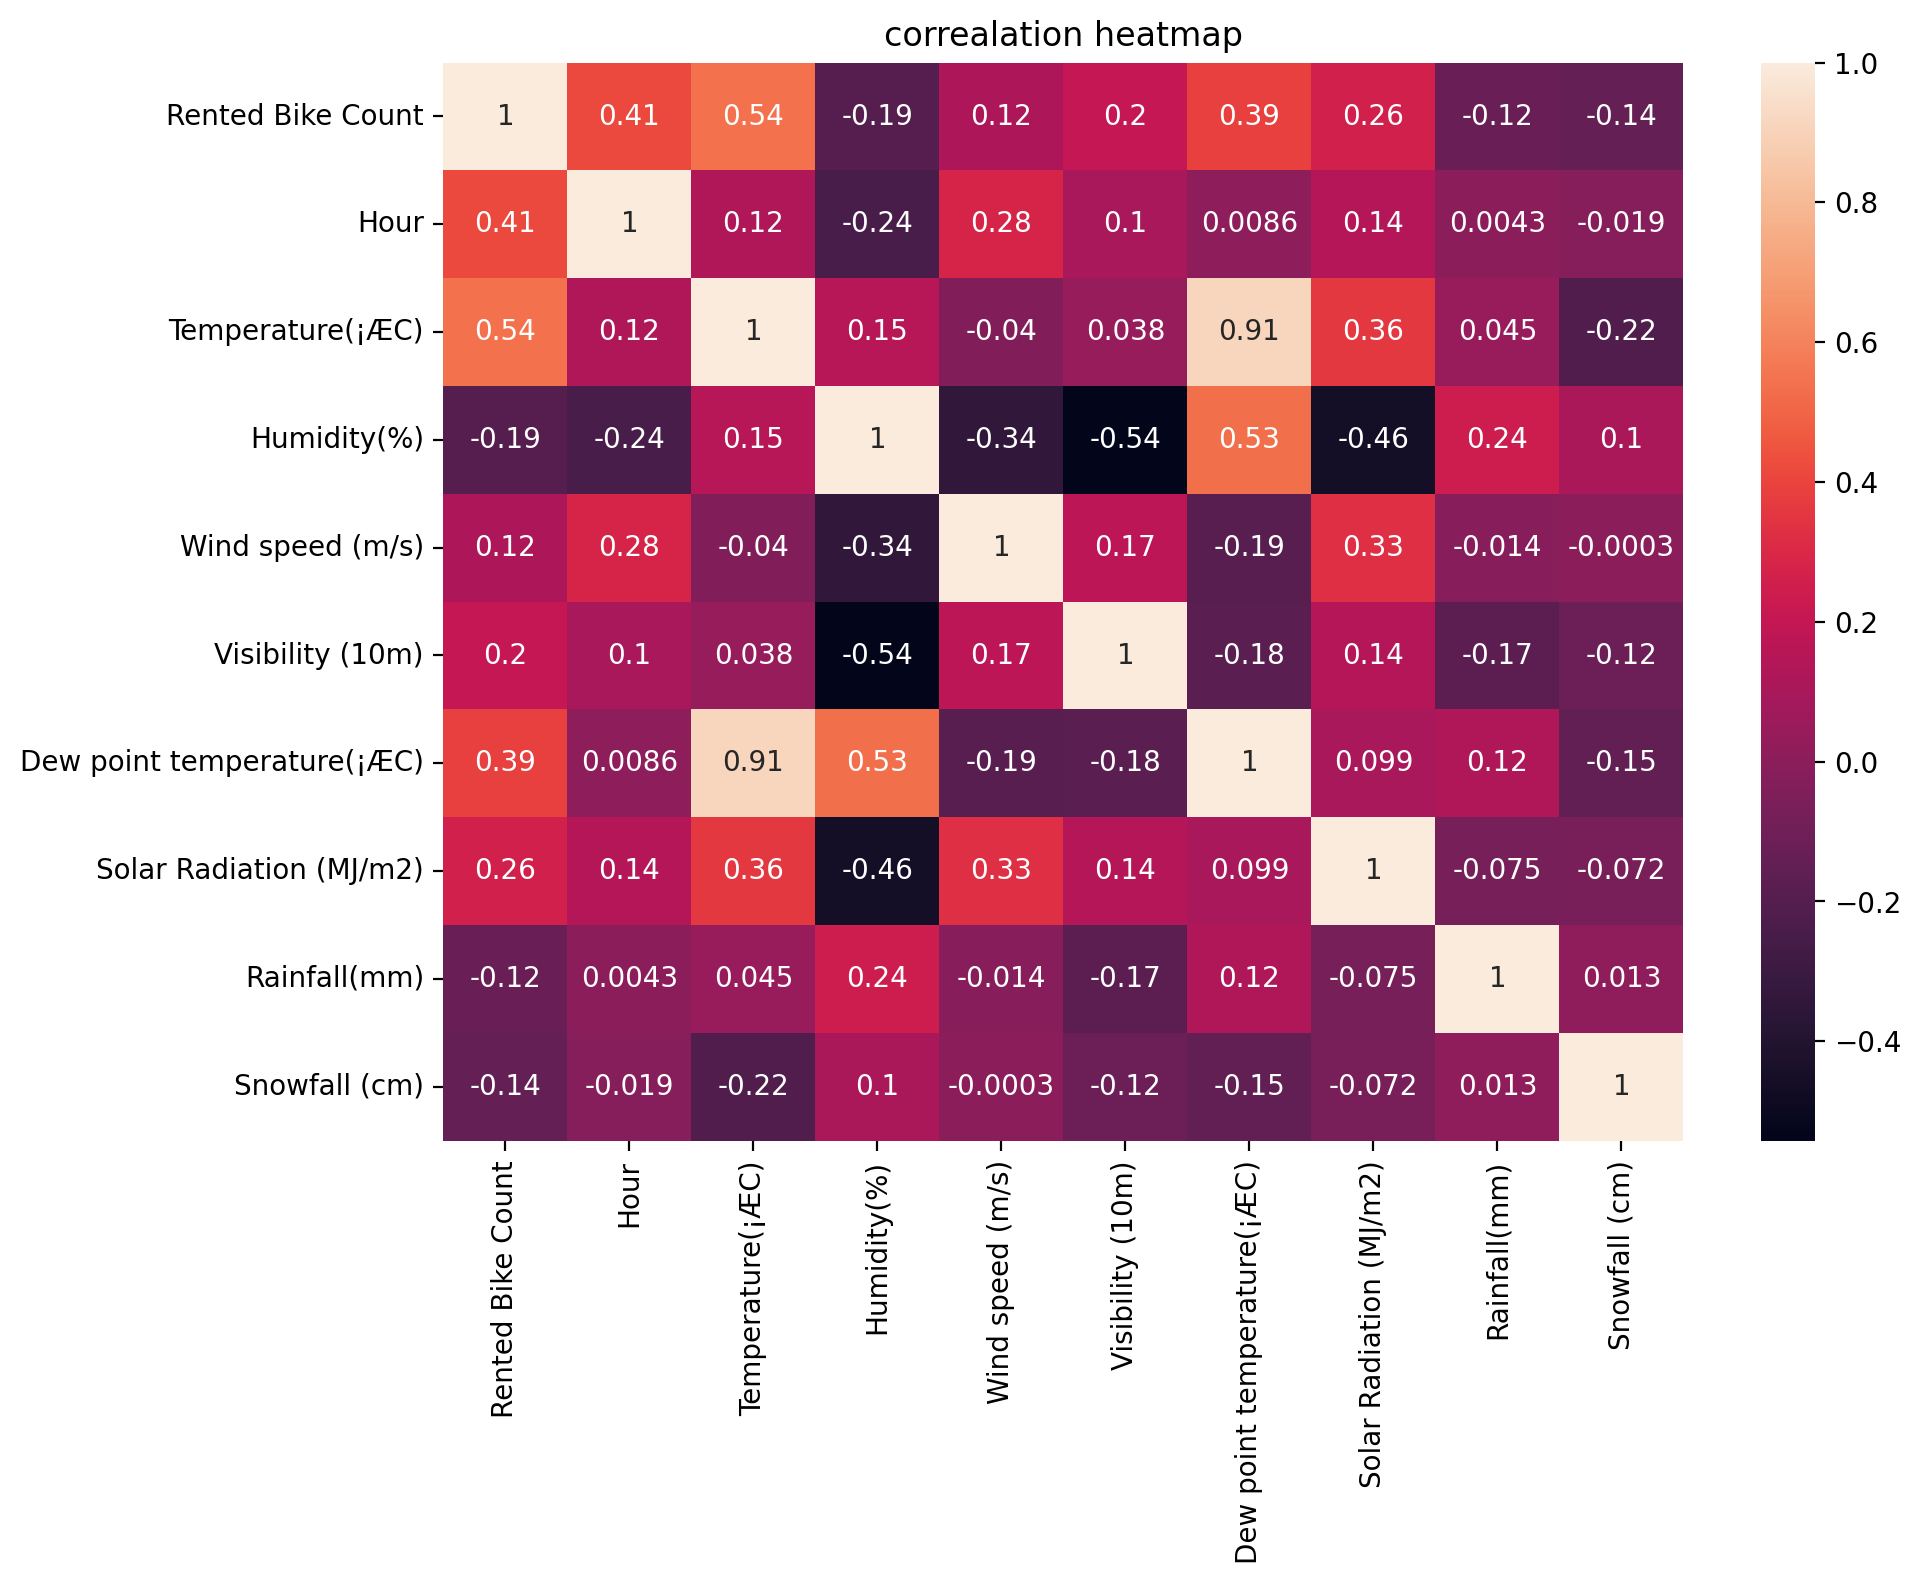

In [38]:
#data[['Rented Bike Count','Hour','Temperature(¡ÆC)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(¡ÆC)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']]
plt.figure(figsize=(10,7))
sns.heatmap(data[['Rented Bike Count','Hour','Temperature(¡ÆC)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(¡ÆC)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']].corr(),annot=True)
plt.title('correalation heatmap') #히트맵

In [40]:
#데이터 여러 행 추출
data[['Rented Bike Count','Hour','Temperature(¡ÆC)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(¡ÆC)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']]

,Rented Bike Count,Hour,Temperature(¡ÆC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(¡ÆC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,1492,16,NaN,42,1.3,1976,5.0,1.22,0.0,0.0
1,1536,14,23.0,64,2.8,520,15.8,1.59,0.0,0.0
2,327,2,6.2,59,0.6,1584,-1.2,0.00,0.0,0.0
3,170,4,23.2,83,1.6,1102,20.1,0.00,0.0,0.0
4,45,5,23.7,64,0.9,876,16.4,0.00,0.1,0.0
...,...,...,...,...,...,...,...,...,...,...
7003,255,7,-9.6,67,1.0,1503,-14.5,0.00,0.0,0.0
7004,104,4,10.6,77,0.9,422,6.7,0.00,0.0,0.0
7005,569,0,14.7,54,1.3,718,5.4,0.00,0.0,0.0
7006,2234,8,20.5,66,1.7,1062,13.9,0.34,0.0,0.0


In [46]:
#상관계수 표로 추출
data[['Rented Bike Count','Hour','Temperature(¡ÆC)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(¡ÆC)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']].corr()

,Rented Bike Count,Hour,Temperature(¡ÆC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(¡ÆC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.412000,0.541908,-0.194577,0.116835,0.199378,0.386236,0.262888,-0.124764,-0.140378
Hour,0.412000,1.000000,0.122931,-0.241683,0.282618,0.101271,0.008633,0.142704,0.004299,-0.019116
Temperature(¡ÆC),0.541908,0.122931,1.000000,0.152777,-0.040290,0.038039,0.911766,0.360516,0.045058,-0.218021
Humidity(%),-0.194577,-0.241683,0.152777,1.000000,-0.342188,-0.542005,0.534907,-0.461830,0.237836,0.103439
Wind speed (m/s),0.116835,0.282618,-0.040290,-0.342188,1.000000,0.173654,-0.186479,0.330813,-0.013948,-0.000302
Visibility (10m),0.199378,0.101271,0.038039,-0.542005,0.173654,1.000000,-0.178756,0.144465,-0.172910,-0.117725
Dew point temperature(¡ÆC),0.386236,0.008633,0.911766,0.534907,-0.186479,-0.178756,1.000000,0.099315,0.121872,-0.151745
Solar Radiation (MJ/m2),0.262888,0.142704,0.360516,-0.461830,0.330813,0.144465,0.099315,1.000000,-0.074714,-0.071934
Rainfall(mm),-0.124764,0.004299,0.045058,0.237836,-0.013948,-0.172910,0.121872,-0.074714,1.000000,0.013482
Snowfall (cm),-0.140378,-0.019116,-0.218021,0.103439,-0.000302,-0.117725,-0.151745,-0.071934,0.013482,1.000000


Seasons
Summer    1598
Autumn    1587
Winter    1570
Spring    1554
Name: count, dtype: int64


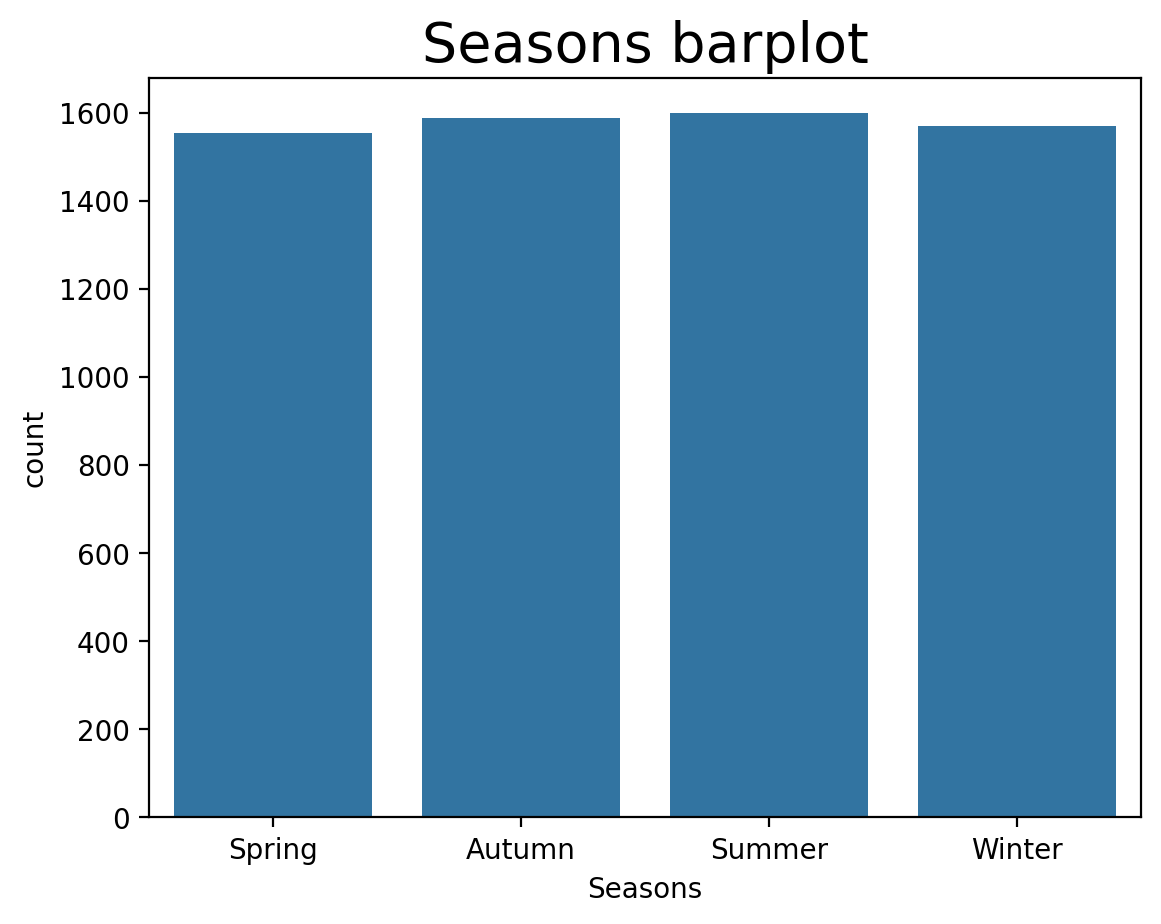

<Axes: xlabel='Seasons', ylabel='Rented Bike Count'>

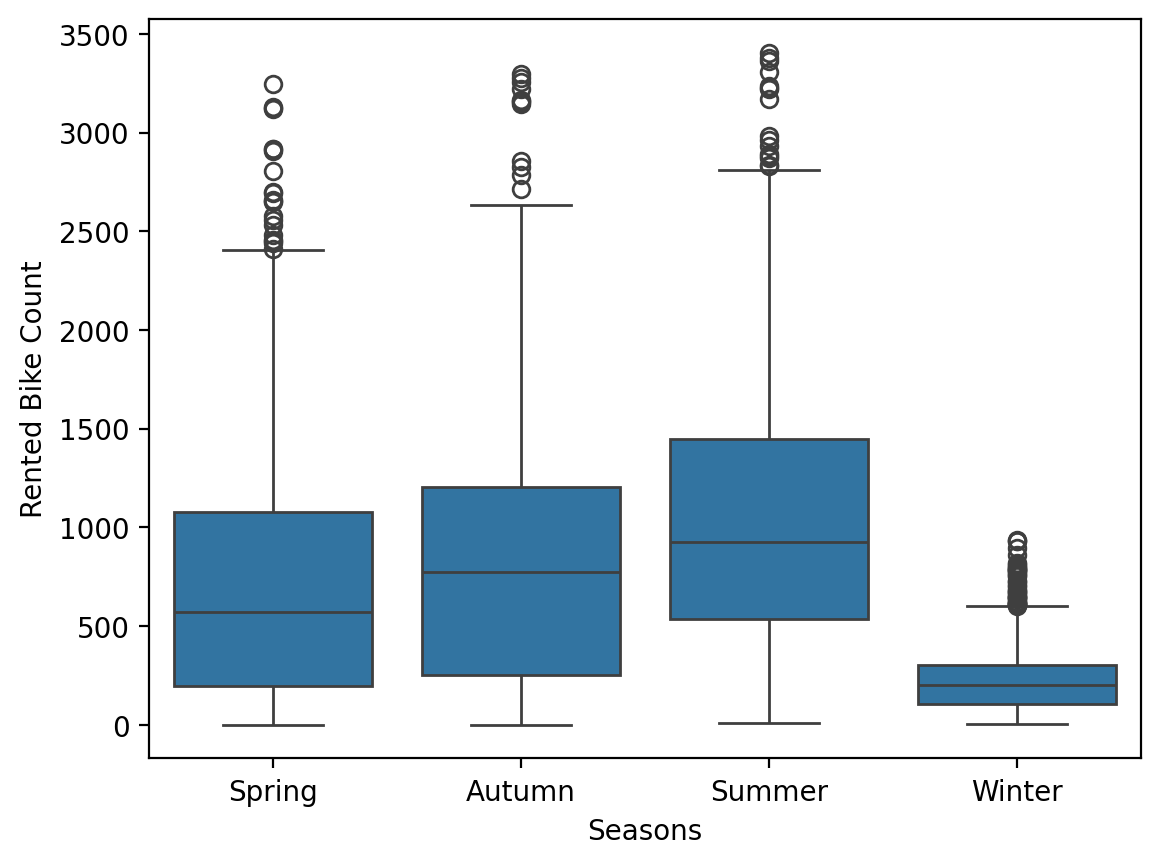

In [54]:
#Seasons
print(data['Seasons'].value_counts())
#시각화
sns.countplot(x='Seasons',data=data)
plt.title('Seasons barplot',fontsize=20)
plt.show()

#Rented Bike Count과의 관계 살펴보기
sns.boxplot(x='Seasons',y='Rented Bike Count',data=data)

#계절 별 총 대여 수는 비슷함
#그러나, 여름의 경우 하루에 빌리는 자전거 대여수가 겨울에 비해 많음

<Axes: xlabel='Seasons', ylabel='count'>

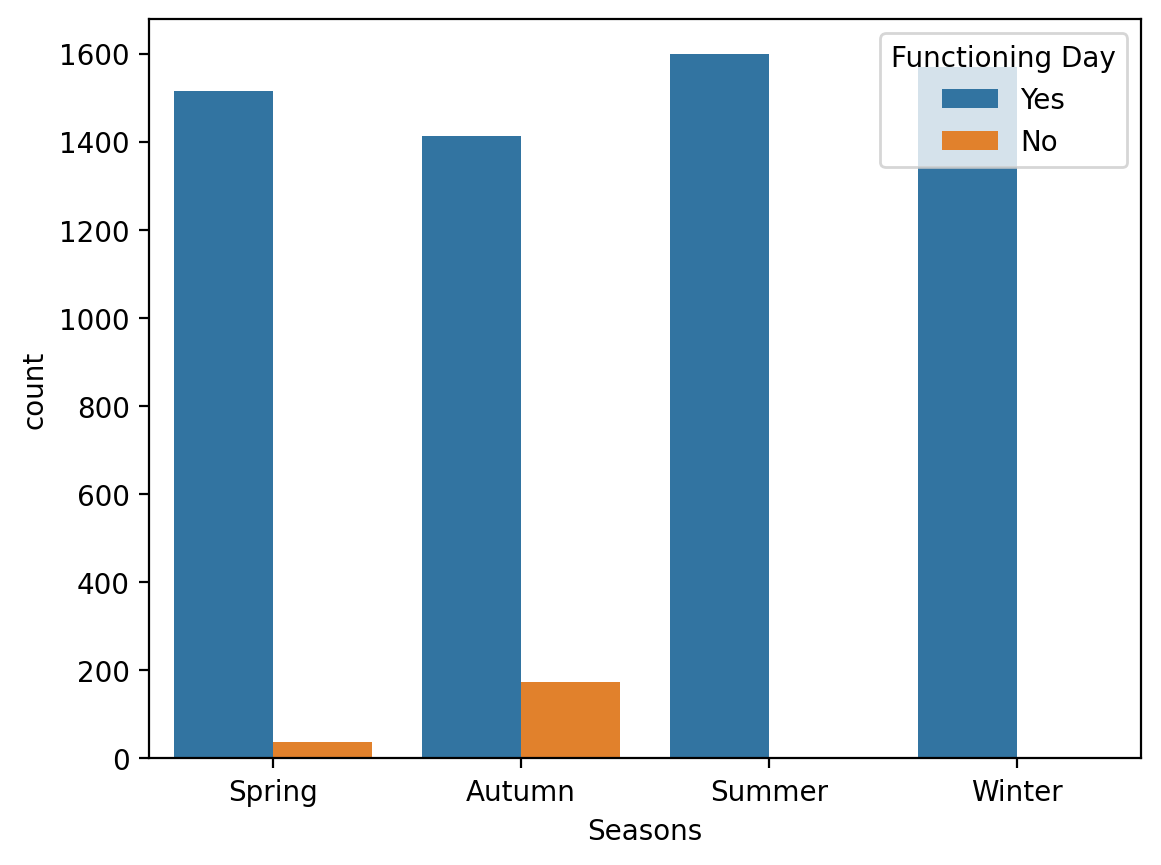

In [60]:
#계절별 오작동 여부
sns.countplot(x='Seasons',hue='Functioning Day',data=data)
#봄과 가을만 오작동 기록이 있고, 특히 가을에 많음

In [40]:
#계절과 오작동 변수의 상관계수 확인
sf_corr = data[['Seasons', 'Functioning Day']]
sf_corr = pd.get_dummies(sf_corr)
sf_corr.corr()

#확실히 가을만 양의 상관계수임

,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Functioning Day_No,Functioning Day_Yes
Seasons_Autumn,1.000000,-0.288813,-0.294062,-0.290723,0.225956,-0.225956
Seasons_Spring,-0.288813,1.000000,-0.290107,-0.286813,-0.027290,0.027290
Seasons_Summer,-0.294062,-0.290107,1.000000,-0.292025,-0.101458,0.101458
Seasons_Winter,-0.290723,-0.286813,-0.292025,1.000000,-0.100306,0.100306
Functioning Day_No,0.225956,-0.027290,-0.101458,-0.100306,1.000000,-1.000000
Functioning Day_Yes,-0.225956,0.027290,0.101458,0.100306,-1.000000,1.000000


->  이에 대해, 오작동의 주요 원인이 뭔지 알아내고자 했으나 실패...
    계절 변수 중에서 Spring변수와 Autumn변수만 따로 추출해서 다른 변수와의 관계를 시각화 해보려 했으나, 방법을 모르겠음.. 

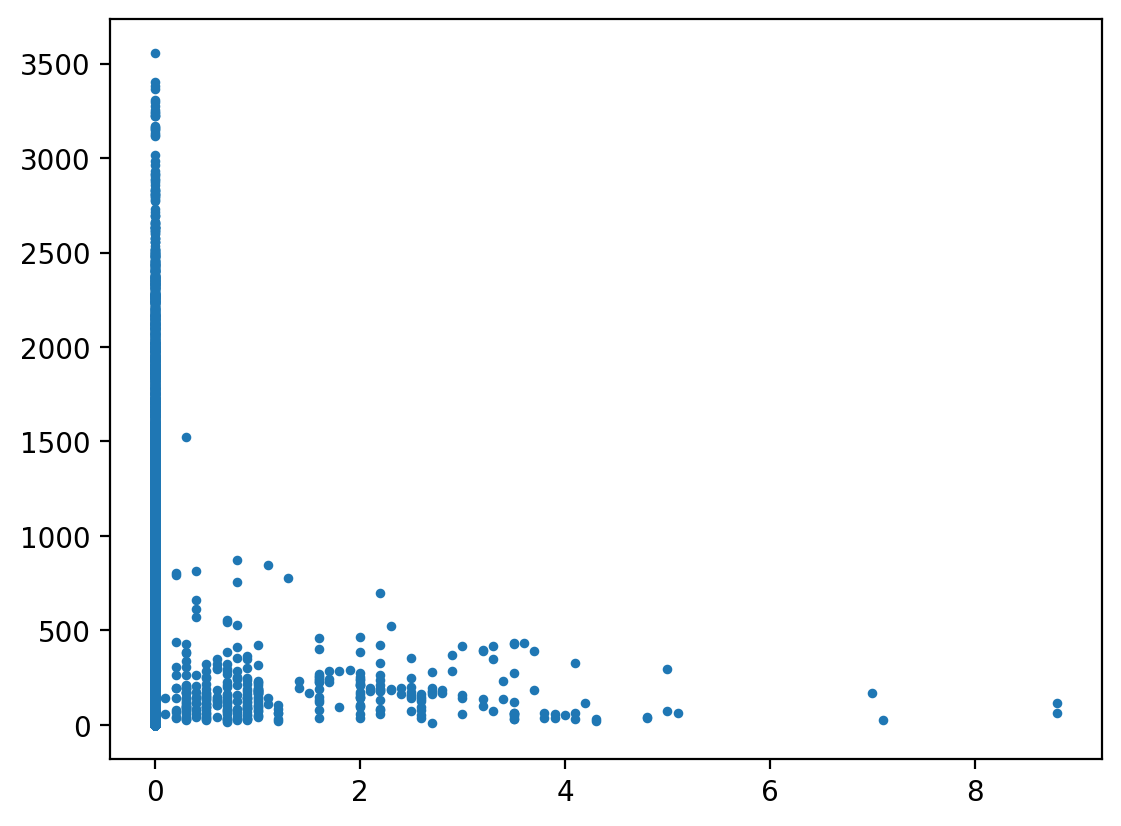

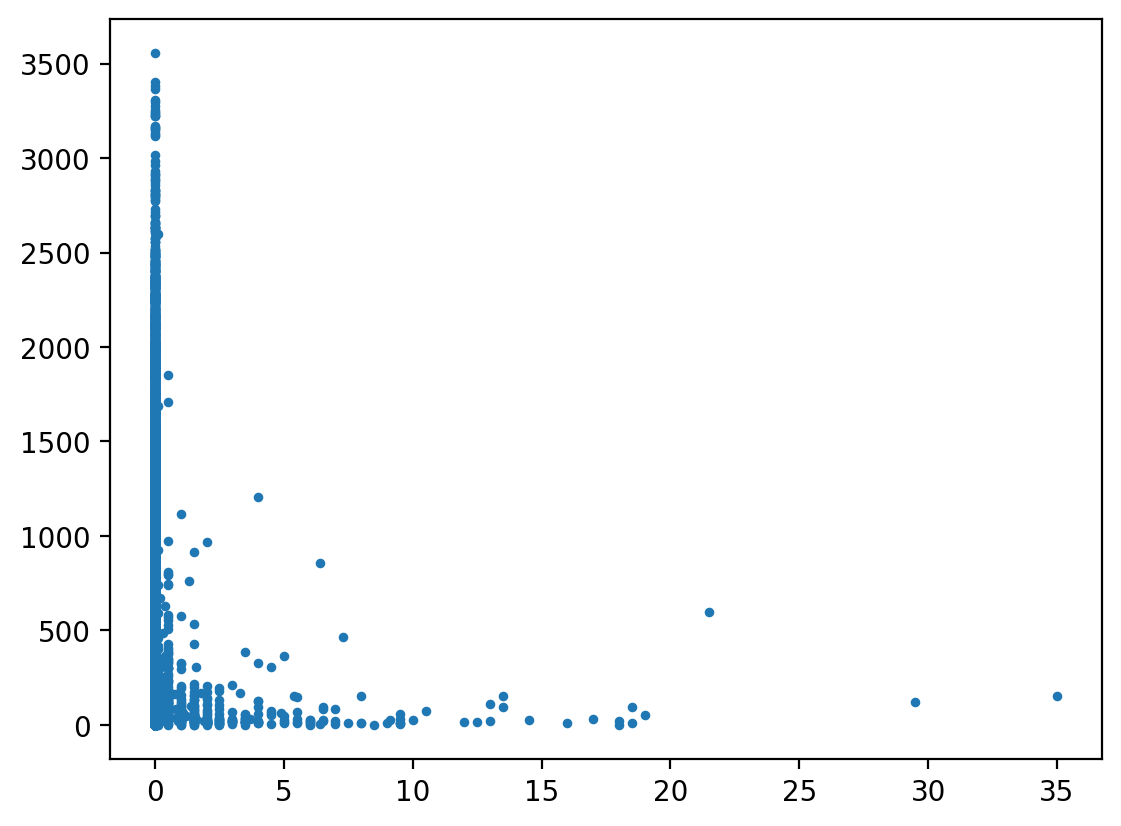

In [82]:
#눈,비와 자전거 대여 수 관계 살펴보기
plt.scatter(data["Snowfall (cm)"],data["Rented Bike Count"], s=6)
plt.show()

plt.scatter(data["Rainfall(mm)"],data["Rented Bike Count"], s=6)
plt.show()

#눈과 비가 자전거 대여 수에 끼치는 영향은 그 결이 비슷함

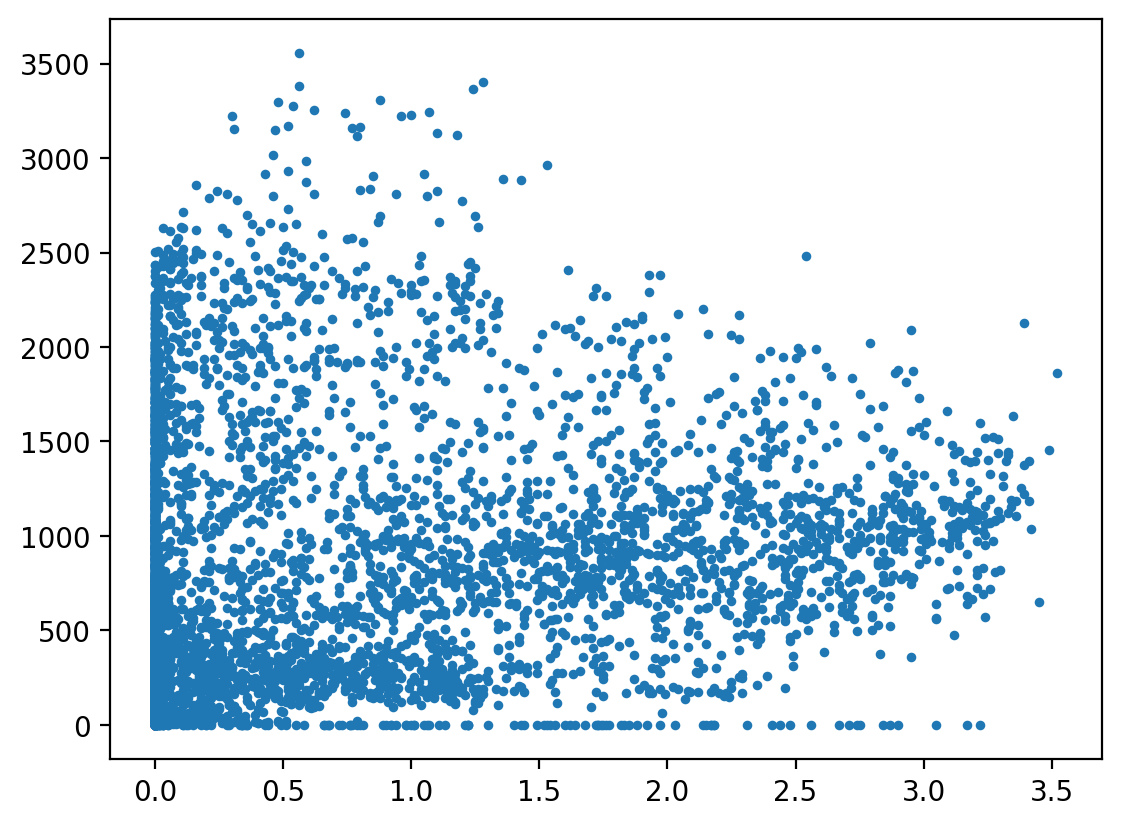

In [88]:
plt.scatter(data["Solar Radiation (MJ/m2)"],data["Rented Bike Count"],s=6)
plt.show()

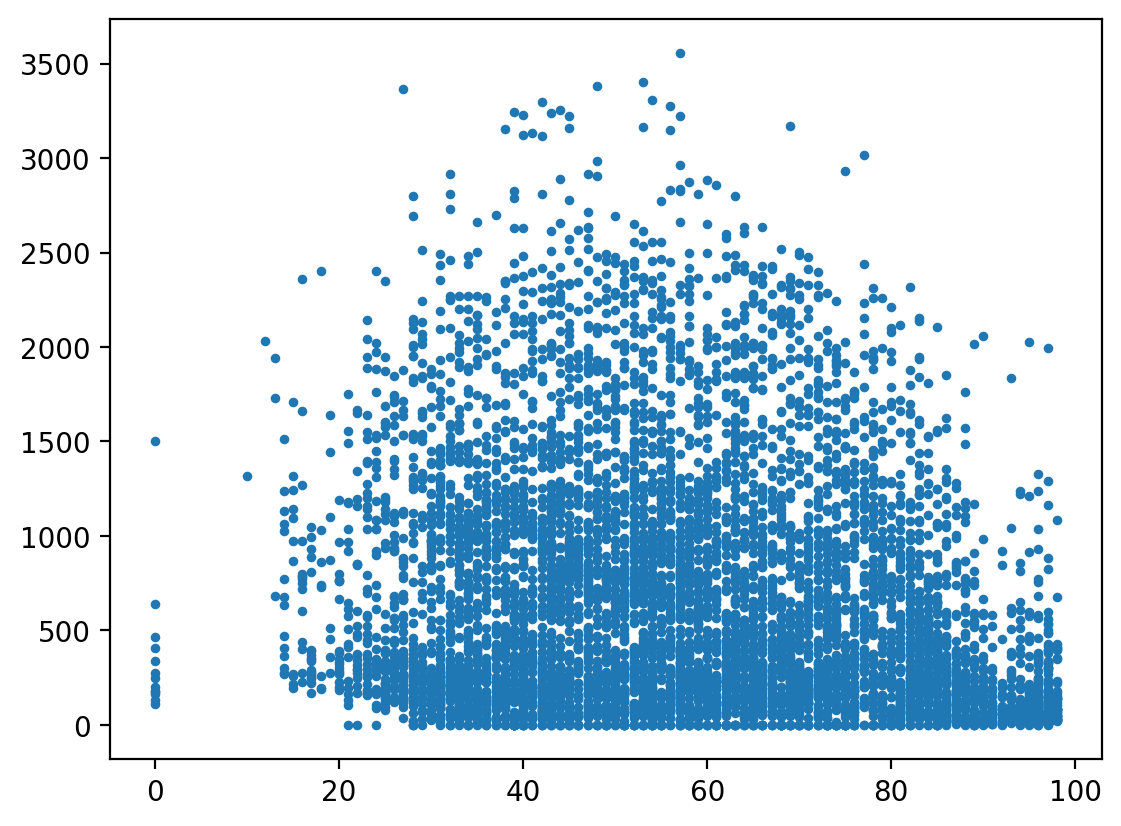

In [100]:
plt.scatter(data["Humidity(%)"],data["Rented Bike Count"], s=6)
plt.show()

#정상 범위의 습도가 40%~60%인 점을 고려했을 때, 그 이상이 되면 자전거 대여량이 현저하게 줄어듦

In [108]:
ss_corr = data[['Seasons', 'Solar Radiation (MJ/m2)']]
ss_corr = pd.get_dummies(ss_corr)
ss_corr.corr()

,Solar Radiation (MJ/m2),Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
Solar Radiation (MJ/m2),1.000000,-0.024766,0.071234,0.130764,-0.167962
Seasons_Autumn,-0.024766,1.000000,-0.288813,-0.294062,-0.290723
Seasons_Spring,0.071234,-0.288813,1.000000,-0.290107,-0.286813
Seasons_Summer,0.130764,-0.294062,-0.290107,1.000000,-0.292025
Seasons_Winter,-0.167962,-0.290723,-0.286813,-0.292025,1.000000


->  이외에도, Solar Radiation (MJ/m2)변수와 다른 변수 간의 관계를 시각화해서
    예를 들어, Solar Radiation (MJ/m2)변수가 2 이상이고  눈이나 비가 안내렸으면 
    여름으로 처리하는 방식으로 결측치를 매꿔보려 했으나, 결측치를 채우는 법을 모르겠음...

In [ ]:
수업 내용 적용하고 이것 저것 참고해서 최대한 해봤습니다. 
잘 적용한 건 맞는지, 더 배워야 할 점에 대한 피드백 부탁드립니다. 감사합니다!